Author: Aria B.

Check out my Medium Blog: https://medium.com/@ariabarv
This is a colab notebook that performs exploratory data analysis on data regarding patients and wheter or not they have heart disease. There are also machine learning models that look at the patients data and predict whether they have heart disease. This notebook is for educational purposes only. The models have not been trained with real clinical data, and therefore should NOT be used to make any sort of predictions on whether a person has heart disease in real life.

If you are using this notebook as an exercise in EDA and classification models then feel free to make a copy of the notebook and edit it. If you are going to share this then please credit me as the author of this notebook and share my medium blog to support me!

Please download the dataset and upload it to your google drive account. Find the data here: https://www.kaggle.com/code/georgyzubkov/heart-disease-exploratory-data-analysis/input

Thank you!

In [2]:
#mount content from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#read the excel file as a data frame using the pandas library
#dataset credits: https://www.kaggle.com/code/georgyzubkov/heart-disease-exploratory-data-analysis/input
#replace file path for your drive setup
df = pd.read_csv("/content/drive/MyDrive/blog/heart.csv")

In [5]:
#the .head() function for a data frame will print the first 5 rows of the data
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [21]:
df.describe()
#this table describes the count (number of occurences), mean (average value in the column),
#std (standard deviation of the column), min (minimum value of the column), the 25th. 50th and 75th
#percentile of the column and the max (maximum value of the column)

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Suppose we want to find the distribution of people that are smokers or non-smokers. We want to create a visualization of this data. This can be easily done using the Seaborn library. Seaborn documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html

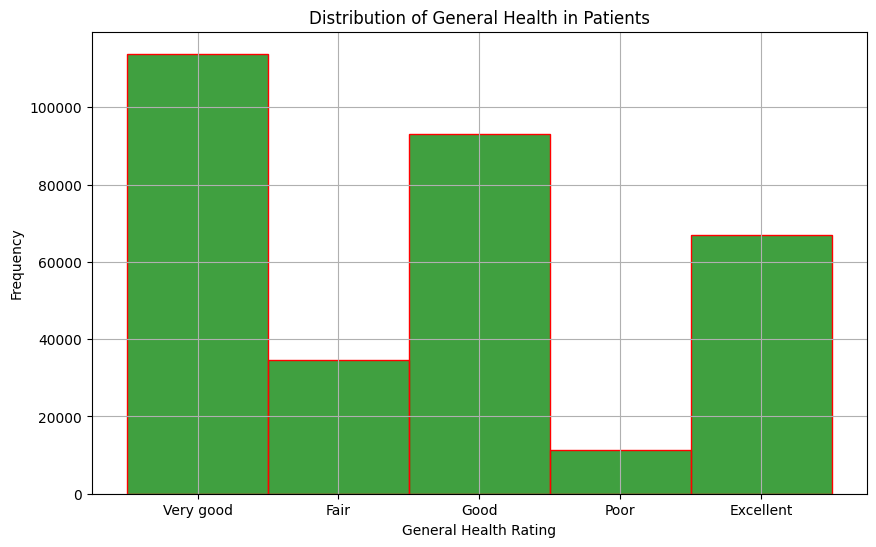

In [30]:
#setting up the graph
plt.figure(figsize=(10, 6))
#plotting the graph with the 'x' parameter as the column from the data frame you want to plot
sns.histplot(data=df, x='GenHealth', color = "green", edgecolor = "red")
#label the axis and title the graph
plt.title('Distribution of General Health in Patients')
plt.xlabel('General Health Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From this visualization, we can see that the vast majority of patients in this data set have "very good" health, followed by "good", "excellent", "fair" and "poor" health respectively. Though this is interesting information, it doesn't really tell us anything about how many patients in each of these categories actually have heart disease. We can solve this problem by using a stacked bar chart, another Seaborn tool.

HeartDisease      No   Yes
GenHealth                 
Excellent      65342  1500
Fair           27593  7084
Good           83571  9558
Poor            7439  3850
Very good     108477  5381


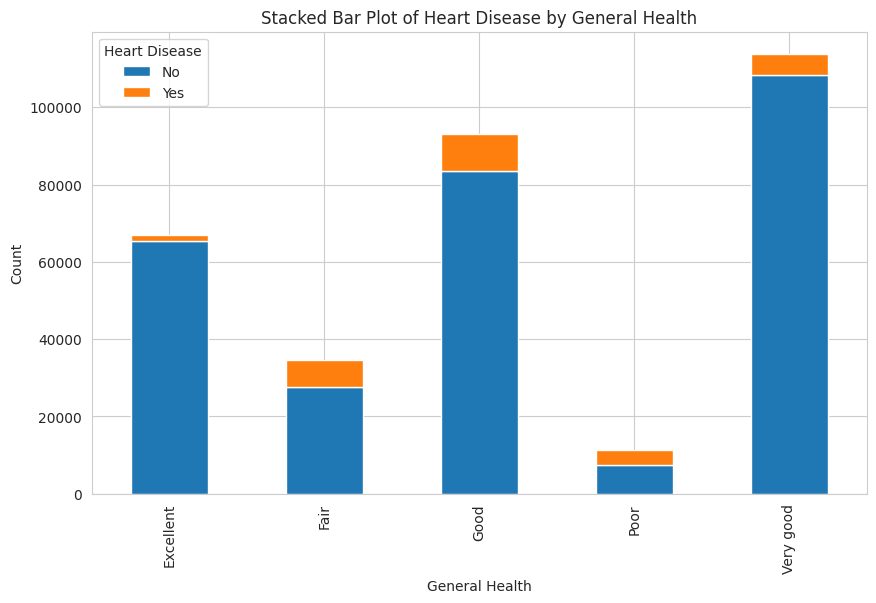

In [56]:
count_data = df.groupby(['GenHealth', 'HeartDisease']).size().unstack(fill_value=0)
#the .groupby function sorts the people within each category of general health who have heart disease and dont
#the .size function counts the amount of people in each group
#the .unstack turns these numbers into a data frame (printed below)
print(count_data)
# create the stacked bar plot
count_data.plot(kind='bar', stacked=True, figsize=(10, 6))
# add labels and title
plt.xlabel("General Health")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of Heart Disease by General Health")
plt.legend(title='Heart Disease')
# display the plot
plt.show()

Now that we have made this plot, we can tell more clearly that you are more likely to have heart disease if you are in good, fair or poor health. This is good to know and making bar plots like this are a good way of creating graphs of categorical data. Let's say that we want to tell if a distribution is similar to a normal distribution, bimodal distribution, uniform or some other kind. We can do this using a violin plot. Violin plots are used to give visualizations of data and compare two groups.

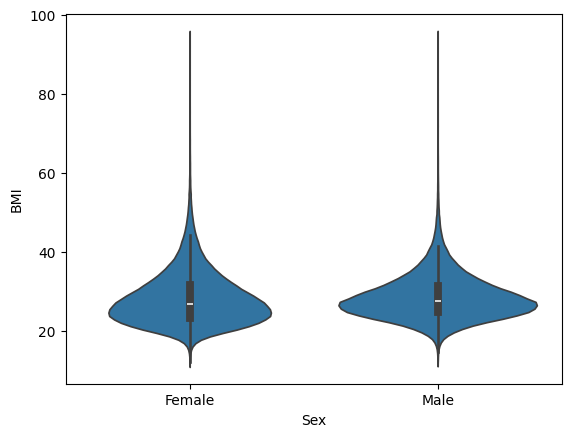

In [12]:
#here, we will be comparing the variables sex and BMI to tell if men and women have different BMIs.
sns.violinplot(x='Sex', y='BMI', data=df)
plt.show()

 The white dot in the center of the black bar within the violin represents the median BMI for each sex. The black bar itself represents the interquartile range (IQR), indicating the middle 50% of the data. Both sexes have a similar median BMI and a similar IQR, suggesting that the central tendency and the spread of BMI values are quite comparable between females and males.Overall, the violin plot shows that the BMI distributions for females and males are quite similar in terms of shape, central tendency, spread, and range. This suggests that, within this dataset, BMI does not vary significantly between sexes.

 One key part of EDA is finding outliers in the quantitative data. Let's say we want to find the outliers in the 'SleepTime' column. The values in this column represent the average amount of hours a patient sleeps at night. We can create a box and whiskers plot to find the min, max, 25th, 50th and 75th percentile and the outliers. This can again be done using Seaborn. Documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='SleepTime'>

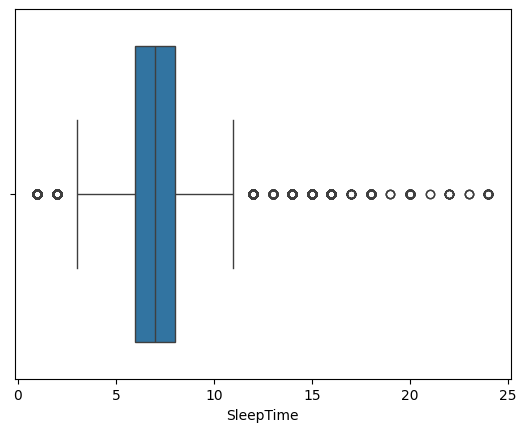

In [9]:
sns.boxplot(x = 'SleepTime', data = df)

This plot tells us the outliers, represented by the circles, the min and max are represented by the 2 black vertical lines that are NOT inside the rectangle. The start of the rectangle is the 25th percentile, the middle line is the 50th percentile or median and the last line of the rectangle is the 75th percentile. This is interesting but say we want to find the outliers for sleep times with respect to general health. This can also be done using a boxplot. See below.

<Axes: xlabel='GenHealth', ylabel='SleepTime'>

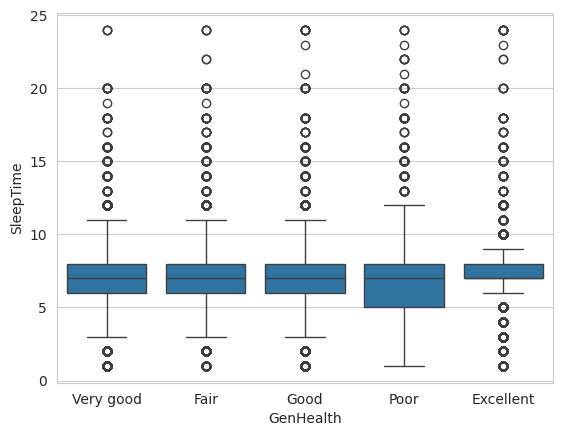

In [10]:
sns.set_style("whitegrid")
sns.boxplot(x = 'GenHealth', y = 'SleepTime', data = df)

This box plot suggests that, regardless of general health status, most people tend to sleep around 7-8 hours. However, individuals with poor general health exhibit a broader range of sleep times, indicating higher variability. The presence of many outliers in each category shows that there are individuals with sleep patterns significantly different from the central tendency, both getting much more or much less sleep.

Now, let's say that we want to see how correlated the different variables in our dataset are. Keep in mind that for correlation plots only numerical data can be considered, so it is necessary to create a new dataframe that drops all columns with non float or integer values. Again, we can do this with Seaborn.

In [4]:
#for machine learning, all variables must be quantitative, so we will replace all the categorical data with a numerical representation
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df.replace({'No, borderline diabetes':2, 'Yes (during pregnancy)':3}, inplace=True)
#for example, all males are represented with the number 1 while all females are represented by 0
df.replace({'Male': 1, 'Female': 0}, inplace=True)
df.replace({'25-29': 25, '30-34': 30, '35-39':35, '18-24':18, '45-49':45, '50-54':50, '60-64':60, '70-74':70, '40-44':40, '75-79':75, '65-69':65, '55-59':55, '80 or older':80}, inplace=True)
df.replace({'White':0, 'Black':1, 'Hispanic':2, 'Asian':3, 'American Indian/Alaskan Native':4, 'Other':5}, inplace=True)
df.replace({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}, inplace=True)

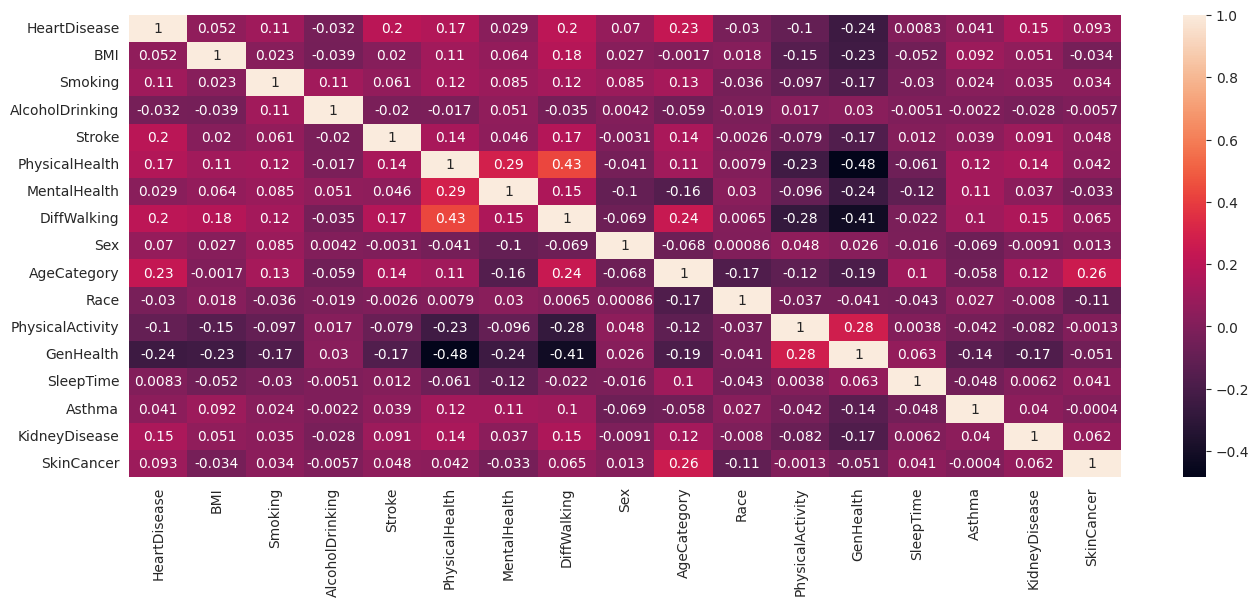

In [67]:
plt.figure(figsize=(16, 6))
df_numeric = df.select_dtypes(include=[float, int])
# Compute and plot correlation matrix
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

From this, we can see that there doesn't appear to be any very strong correlations between the numerical data in this dataset. Now that we have done a good amount of EDA, we want to see if our variables [age, general health, race, etc.] can be used to predict whether a patient has heart disease. To do this, we can use a machine learning model. I will be using SVM and KNN models. To understand how these models work, feel free to check out my blog on common classification models here: https://medium.com/p/f65f6ea3f3c6

In [7]:
#import the required libraries from scikitlearn
#sckitlearn documentation: https://scikit-learn.org/stable/modules/svm.html
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

# since an SVM is a very computationally expensive model, we will only use 10% of the data and then further split that for training and testing
df_sample = df.sample(frac=0.1, random_state=42)
#we will further split the 10% of our data into a training and testing set. test_size indiciates that we will be using 10% of the data for testing and 90% for training
#random state ensures that we are randomly selecting data for testing and training
dfTrain, dfTest = train_test_split(df_sample, test_size=0.1, random_state=42)

#set up the training and testing features
features_train = dfTrain.drop('HeartDisease', axis=1)
target_train = dfTrain['HeartDisease']
features_test = dfTest.drop('HeartDisease', axis=1)
target_test = dfTest['HeartDisease']

X_train = features_train
X_test = features_test
y_train = target_train
y_test = target_test

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#fit the SVM
#kernel indicates what dimension you are transforming the data into
#C indicates the degree of fitting you want for the model, a higher C value means an overfitted model
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train_scaled, y_train)

predictions = svm_classifier.predict(X_test_scaled)

#print the accuracy scores
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9061913696060038
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2889
           1       0.62      0.07      0.13       309

    accuracy                           0.91      3198
   macro avg       0.77      0.53      0.54      3198
weighted avg       0.88      0.91      0.87      3198



After running the SVM, we see that the accuracy score is around 90% *note: this may be slighty different when you run the code since the model is randomly picking values for testing and training.*

Now, let's try a different model. Let's use KNN, or K-Nearest-Neighbors. This is another classification technique. Below is the code for this KNN model. Please note that KNN runs much quicker than an SVM, so I have used all the data for the model. Expect it to take around 1-1.5 minutes to run.

In [13]:
#import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint
from sklearn import metrics

#randomly assigning 10% of the data for testing
dfTrain, dfTest = train_test_split(df, test_size=0.1, random_state=42)

#set up the training and testing sets
features_train = dfTrain.drop('HeartDisease', axis=1)
target_train = dfTrain['HeartDisease']
features_test = dfTest.drop('HeartDisease', axis=1)
target_test = dfTest['HeartDisease']

X_train = features_train
X_test = features_test
y_train = target_train
y_test = target_test

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit classifier to the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the scaled test data
predictions = knn_classifier.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9033771106941839
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29112
           1       0.39      0.14      0.21      2868

    accuracy                           0.90     31980
   macro avg       0.66      0.56      0.58     31980
weighted avg       0.87      0.90      0.88     31980



We can see that the KNN and SVM have very similar accuracy scores! Now we have covered the basics of EDA and building a classification model!

Check out my medium blog if you want to learn more: https://medium.com/@ariabarv

